In [15]:
import os, glob
from PIL import Image
import numpy as np
import labels

In [16]:
image_dir = "./P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/"
mask_dir = "./P8_Cityscapes_gtFine_trainvaltest/gtFine/"
out_dir = "./preprocessed/"

In [17]:
map_id_to_cat = {}
for label in labels.labels :
    map_id_to_cat.update({ label.id : label.categoryId})

In [18]:
def preprocess_image_mask(im_path, mask_path, output_dir):
    
    # Image block
    # Opens an image in RGB mode
    im = Image.open(im_path) 
    # Size of the image in pixels (size of original image)
    width, height = im.size
    newsize = (width//4, height//4)
    #newsize = (256, 128)
    im = im.resize(newsize)
    im.save(os.path.join(output_dir, os.path.basename(im_path)) )

    # Mask block
    mask = Image.open(mask_path)
    mask = np.array(mask)
    mask_prepro = np.vectorize(map_id_to_cat.get)(mask)
    mask = Image.fromarray(np.uint8 (mask_prepro))
    mask = mask.resize(newsize, Image.NEAREST )
    mask.save(os.path.join(output_dir, os.path.basename(mask_path)) )


In [19]:
for dir_name in os.listdir(image_dir):
    if dir_name!=".DS_Store" :
        data_dir = os.path.join(image_dir, dir_name)
        for city_dir in os.listdir(data_dir):
            city_path = os.path.join(data_dir, city_dir)
            city_path += '/*.png'
            for name in glob.glob(city_path):
                image_id = os.path.basename(name)
                image = os.path.join(image_dir, dir_name + '/' + city_dir + '/' + image_id  )
                image_id = image_id.split('left')[0]
                mask = os.path.join(mask_dir, dir_name + '/' + city_dir + '/' + image_id + 'gtFine_labelIds.png' )
                preprocess_image_mask(image, mask,  os.path.join(out_dir, dir_name) )

In [ ]:
#CLASSES = ['void', 'flat', 'construction', 'object', 'nature', 'sky', 'human', 'vehicle']

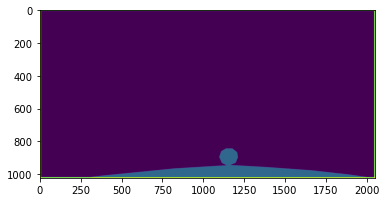

In [33]:
id_image = "bonn_000000_000019"
mask_ = "/Users/zeineb/Lab8/P8_Cityscapes_gtFine_trainvaltest/gtFine/test/bonn/" + id_image +"_gtFine_labelIds.png"
mask = Image.open(mask_)
mask = np.array(mask)
mask_prepro = mask# np.vectorize(map_id_to_cat.get)(mask)
mask = Image.fromarray(np.uint8 (mask_prepro))
plt.imshow(mask)

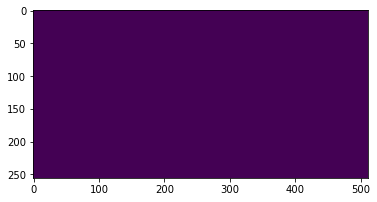

In [44]:
id_image = "bonn_000000_000019"
mask_ = "/Users/zeineb/Lab8/P8_Cityscapes_gtFine_trainvaltest/gtFine/test/bonn/" + id_image +"_gtFine_labelIds.png"
mask = Image.open(mask_)

width, height = mask.size
newsize = (width//4, height//4)
mask = mask.resize(newsize, Image.NEAREST )

mask = np.array(mask)
mask_prepro =  np.vectorize(map_id_to_cat.get)(mask)
mask = Image.fromarray(np.uint8 (mask_prepro))
plt.imshow(mask)

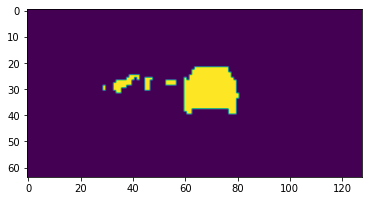

In [43]:
id_image = "cologne_000006_000019"#"bonn_000000_000019"
#mask_ = "/Users/zeineb/Lab8/P8_Cityscapes_gtFine_trainvaltest/gtFine/test/bonn/" + id_image +"_gtFine_labelIds.png"
mask_ = "./preprocessed/train/" + id_image +"_gtFine_labelIds.png"
mask = Image.open(mask_)

width, height = mask.size
newsize = (width//4, height//4)
mask = mask.resize(newsize, Image.NEAREST )

mask = np.array(mask)

mask_prepro =  np.vectorize(map_id_to_cat.get)(mask)
mask = Image.fromarray(np.uint8 (mask_prepro))
plt.imshow(mask)